<a href="https://colab.research.google.com/github/Uriel-MCarvalho/CIENCIA-DE-DADOS/blob/main/nycflights13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise de Dados de Voos utilizando R**

Este documento descreve a análise de voos utilizando o pacote 'nycflights13'.


# **Carregando e Instalando Bibliotecas**

In [ ]:
library_names <- c("tidyverse","nycflights13","lubridate","ggmap","scales","plotly")

# Verifica se as bibliotecas estão instaladas e carregadas
lapply(library_names, function(x) {
  if(!require(x, character.only = TRUE)) {
    install.packages(x)
    library(x, character.only = TRUE)
  }
})


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

#**Carregando e Visualizando os Dados**

In [ ]:
flights <- nycflights13::flights
head(flights)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


#**Objetivos da Análise**

##**Encontrar Voos que Atendam a Critérios Específicos**

###Voos com atraso na chegada de duas horas ou mais.
```
voos_atraso_chegada <- flights %>%
  filter(arr_delay >= 120)
```

###Voos que tiveram como destino Houston (IAH ou HOU).

```
voos_para_houston <- flights %>%
  filter(dest %in% c("IAH", "HOU"))
```

###Voos que partiram durante o verão (julho, agosto e setembro).
```
voos_verao <- flights %>%
  filter(month %in% 7:9)

```

###Voos que chegaram com mais de duas horas de atraso, mas não saíram atrasados.
```
voos_atraso_chegada_sem_atraso_partida <- flights %>%
  filter(arr_delay >= 120, dep_delay < 0)

```
###Voos que partiram entre meia-noite e 6h.
```
voos_partida_madrugada <- flights %>%
  filter(hour >= 0 & hour <= 6)

```

##**Quantificação, Classificação e Alteração**

###Contagem de Voos sem Horário de Partida
```
voos_sem_partida <- flights %>%
  filter(is.na(dep_time)) %>%
  nrow()
```

###Classificação de Voos por Atraso
```
voos_mais_atrasados <- flights %>%
  arrange(desc(dep_delay), desc(arr_delay))
```

###Voos com Maior Distância Percorrida
```
voos_maior_distancia <- flights %>%
  arrange(desc(distance))
```

###Adição de Variáveis de Hora de Partida
```
flights <- flights %>%
  mutate(
    dep_hour = ifelse(
      between(as.numeric(str_sub(dep_time, 1, 2)), 0, 23),
      as.numeric(str_sub(dep_time, 1, 2)),
      as.numeric(str_sub(dep_time, 1, 1))
    ),
    dep_minute = ifelse(
      between(as.numeric(str_sub(dep_time, 1, 2)), 0, 23),
      as.numeric(str_sub(dep_time, 3, 4)),
      as.numeric(str_sub(dep_time, 2, 3))
    )
  ) %>%
  select(dep_hour, dep_minute, everything())

```

#**Insights**


###Média do número de voos por mês.  

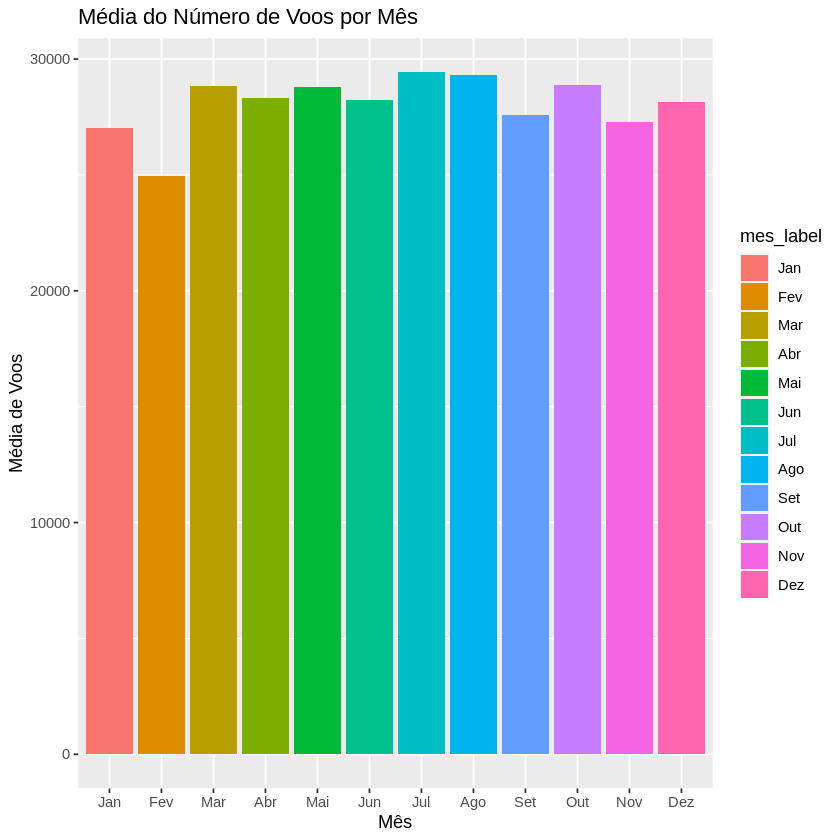

In [ ]:
meses <- c("Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez")

flights %>%
  group_by(month) %>%
  summarise(avg_flights = mean(n())) %>%
  mutate(mes_label = factor(meses[month], levels = meses)) %>%
  ggplot(aes(x = mes_label, y = avg_flights, fill = mes_label)) +
  geom_bar(stat = "identity") +
  labs(title = "Média do Número de Voos por Mês",
       x = "Mês",
       y = "Média de Voos") +
  scale_x_discrete(labels = meses)


###Segmentação de Atrasos

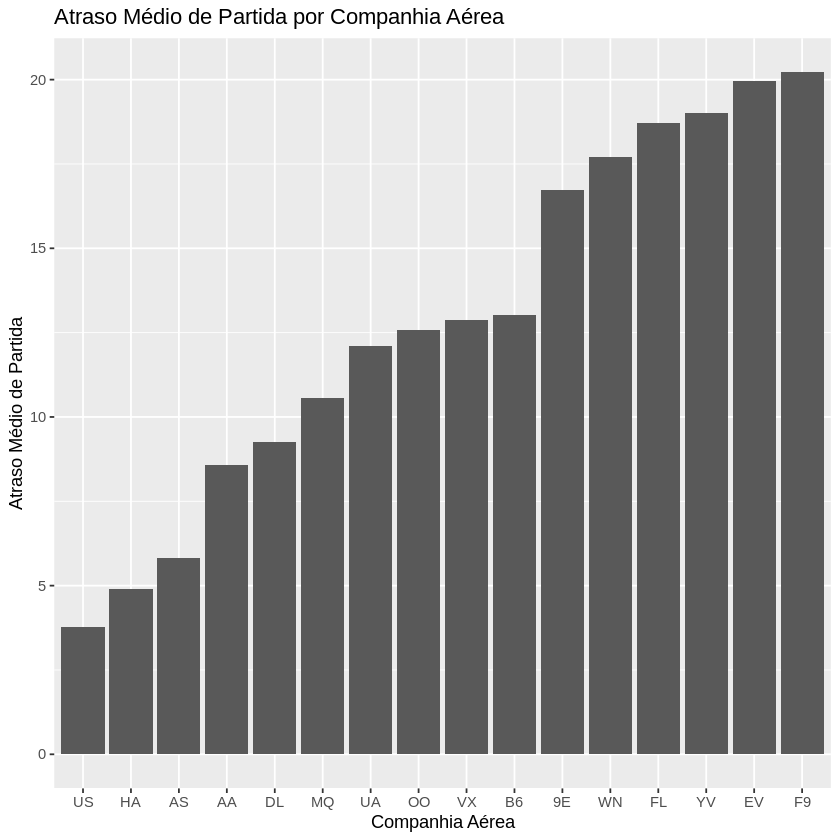

In [ ]:
flights %>%
  group_by(carrier) %>%
  summarize(avg_dep_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(carrier, avg_dep_delay), y = avg_dep_delay)) +
  geom_bar(stat = "identity") +
  labs(title = "Atraso Médio de Partida por Companhia Aérea",
       x = "Companhia Aérea",
       y = "Atraso Médio de Partida")


###Correlação e Relações de Causa e Efeito

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9430 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”


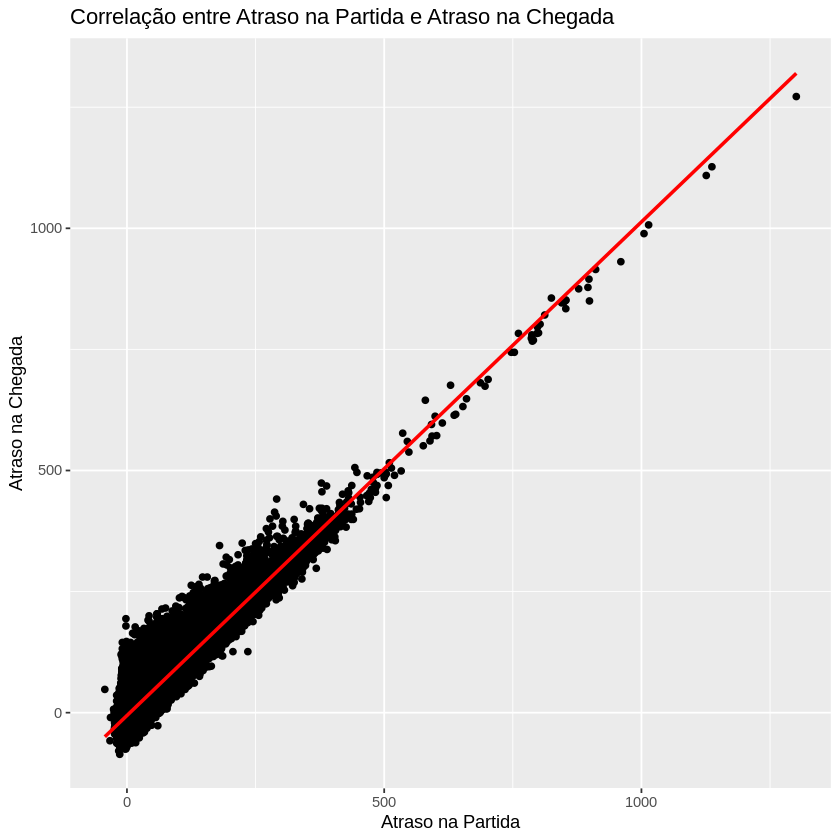

In [ ]:
flights %>%
  ggplot(aes(x = dep_delay, y = arr_delay)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Correlação entre Atraso na Partida e Atraso na Chegada",
       x = "Atraso na Partida",
       y = "Atraso na Chegada")



[1] 35442

[1] 40701

[1] 336776

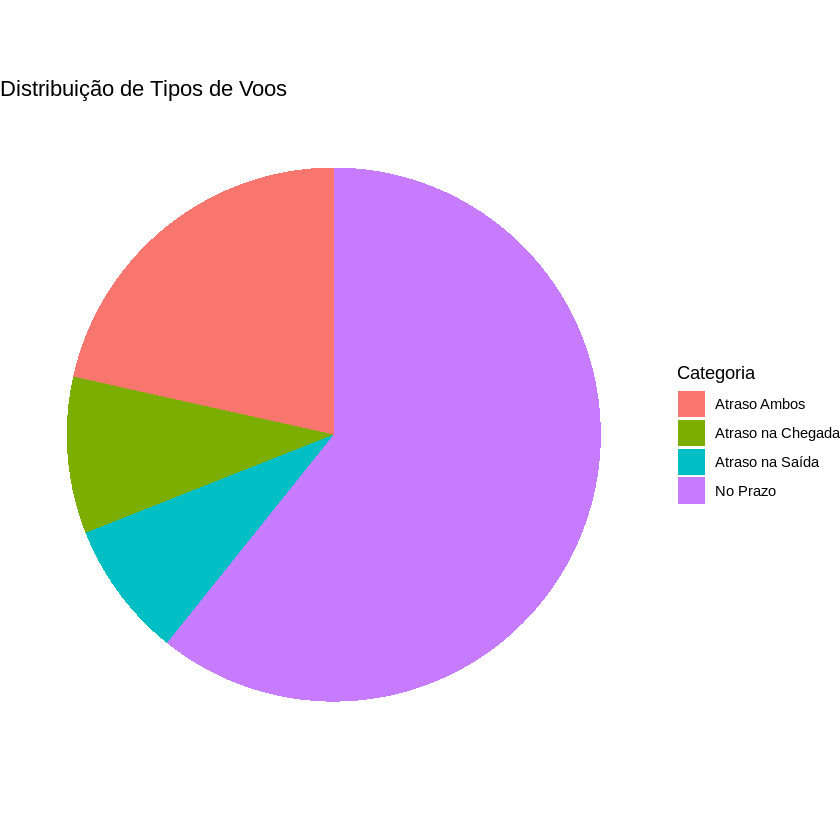

In [ ]:
library(ggplot2)
library(scales)  # Necessário para formatar as porcentagens nos rótulos

# Contagem dos diferentes tipos de voos
count_atraso_saida_sem_atraso_chegada
count_saida_sem_atraso_chegada_atraso
total_de_voos
count_no_atraso <- total_de_voos - count_atraso_saida_sem_atraso_chegada - count_saida_sem_atraso_chegada_atraso

# Calculando a contagem de voos que se atrasaram tanto na saída quanto na chegada
count_atraso_ambos <- nrow(flights %>%
                            filter(dep_delay > 0, arr_delay > 0))

# Calculando as porcentagens
percent_atraso_saida_sem_atraso_chegada <- (count_atraso_saida_sem_atraso_chegada / total_de_voos) * 100
percent_saida_sem_atraso_chegada_atraso <- (count_saida_sem_atraso_chegada_atraso / total_de_voos) * 100
percent_no_atraso <- (count_no_atraso / total_de_voos) * 100
percent_atraso_ambos <- (count_atraso_ambos / total_de_voos) * 100

# Criando um data frame para o gráfico de pizza
pie_data <- data.frame(
  Categoria = c("Atraso na Saída", "Atraso na Chegada", "No Prazo", "Atraso Ambos"),
  Porcentagem = c(percent_atraso_saida_sem_atraso_chegada, percent_saida_sem_atraso_chegada_atraso, percent_no_atraso, percent_atraso_ambos)
)

# Criando o gráfico de pizza
ggplot(pie_data, aes(x = "", y = Porcentagem, fill = Categoria)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  labs(title = "Distribuição de Tipos de Voos") +
  scale_y_continuous(labels = scales::percent_format(scale = 1))  # Formatação das porcentagens nos rótulos

